In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data1= pd.read_csv('/Users/rounaksarkar/Desktop/ipl_score_prediction_and_analysis/datasets/deliveries.csv')
data2= pd.read_csv('/Users/rounaksarkar/Desktop/ipl_score_prediction_and_analysis/datasets/matches.csv')
data3= pd.read_csv('/Users/rounaksarkar/Desktop/ipl_score_prediction_and_analysis/datasets/IPL2023_Match_Scoreboard.csv')

In [8]:
data1

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,1359475,2023,2023-03-31,"Narendra Modi Stadium, Ahmedabad",1,0.1,Chennai Super Kings,Gujarat Titans,DP Conway,RD Gaikwad,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1359475,2023,2023-03-31,"Narendra Modi Stadium, Ahmedabad",1,0.2,Chennai Super Kings,Gujarat Titans,DP Conway,RD Gaikwad,...,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,1359475,2023,2023-03-31,"Narendra Modi Stadium, Ahmedabad",1,0.3,Chennai Super Kings,Gujarat Titans,RD Gaikwad,DP Conway,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1359475,2023,2023-03-31,"Narendra Modi Stadium, Ahmedabad",1,0.4,Chennai Super Kings,Gujarat Titans,RD Gaikwad,DP Conway,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1359475,2023,2023-03-31,"Narendra Modi Stadium, Ahmedabad",1,0.5,Chennai Super Kings,Gujarat Titans,DP Conway,RD Gaikwad,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17858,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",2,14.2,Chennai Super Kings,Gujarat Titans,S Dube,RA Jadeja,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17859,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",2,14.3,Chennai Super Kings,Gujarat Titans,RA Jadeja,S Dube,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17860,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",2,14.4,Chennai Super Kings,Gujarat Titans,S Dube,RA Jadeja,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17861,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",2,14.5,Chennai Super Kings,Gujarat Titans,RA Jadeja,S Dube,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
data2

,season,team1,team2,date,match_number,venue,city,toss_winner,toss_decision,player_of_match,umpire1,umpire2,reserve_umpire,match_referee,winner,winner_runs,winner_wickets,match_type
0,2023,Chennai Super Kings,Gujarat Titans,2023/03/31,1,Narendra Modi Stadium,Ahmedabad,Gujarat Titans,field,Rashid Khan,Nitin Menon,HAS Khalid,A Bengeri,J Srinath,Gujarat Titans,NaN,5.0,Group
1,2023,Punjab Kings,Kolkata Knight Riders,2023/04/01,2,Punjab Cricket Association IS Bindra Stadium,Chandigarh,Kolkata Knight Riders,field,Arshdeep Singh,BNJ Oxenford,YC Barde,PM Joshi,M Nayyar,Punjab Kings,7.0,NaN,Group
2,2023,Lucknow Super Giants,Delhi Capitals,2023/04/01,3,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow,Delhi Capitals,field,MA Wood,AK Chaudhary,NA Patwardhan,M Kuppuraj,DS Manohar,Lucknow Super Giants,50.0,NaN,Group
3,2023,Rajasthan Royals,Sunrisers Hyderabad,2023/04/02,4,Rajiv Gandhi International Stadium,Hyderabad,Sunrisers Hyderabad,field,JC Buttler,KN Ananthapadmanabhan,R Pandit,Abhijit Bhattacharya,V Narayan Kutty,Rajasthan Royals,72.0,NaN,Group
4,2023,Mumbai Indians,Royal Challengers Bangalore,2023/04/02,5,M Chinnaswamy Stadium,Bengaluru,Royal Challengers Bangalore,field,F du Plessis,Nitin Menon,Tapan Sharma,A Bengeri,J Srinath,Royal Challengers Bangalore,NaN,8.0,Group
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,2023,Royal Challengers Bangalore,Gujarat Titans,2023/05/21,70,M Chinnaswamy Stadium,Bengaluru,Gujarat Titans,field,Shubman Gill,Nitin Menon,VK Sharma,VM Dhokre,J Srinath,Gujarat Titans,NaN,6.0,Group
70,2023,Chennai Super Kings,Gujarat Titans,2023/05/23,71,MA Chidambaram Stadium,Chennai,Gujarat Titans,field,RD Gaikwad,AK Chaudhary,CB Gaffaney,VK Sharma,M Nayyar,Chennai Super Kings,15.0,NaN,Qualifier
71,2023,Mumbai Indians,Lucknow Super Giants,2023/05/24,72,MA Chidambaram Stadium,Chennai,Mumbai Indians,bat,Akash Madhwal,BNJ Oxenford,VK Sharma,AK Chaudhary,V Narayan Kutty,Mumbai Indians,81.0,NaN,Eliminator
72,2023,Gujarat Titans,Mumbai Indians,2023/05/26,73,Narendra Modi Stadium,Ahmedabad,Mumbai Indians,field,Shubman Gill,Nitin Menon,RJ Tucker,KN Ananthapadmanabhan,J Srinath,Gujarat Titans,62.0,NaN,Qualifier


In [10]:
data3

,match_no,Home_team_run,Home_team_wickets,Home_team_over,Away_team_run,Away_team_wickets,Away_team_over
0,1,182,5,19.2,178,7,20.0
1,2,191,5,20.0,146,7,16.0
2,3,193,6,20.0,143,9,20.0
3,4,131,8,20.0,203,5,20.0
4,5,172,2,16.2,171,7,20.0
...,...,...,...,...,...,...,...
65,66,187,5,20.0,189,6,19.4
66,67,146,9,20.0,223,3,20.0
67,68,175,7,20.0,176,8,20.0
68,69,201,2,18.0,200,5,20.0


In [11]:
data1.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,1359475,2023,2023-03-31,"Narendra Modi Stadium, Ahmedabad",1,0.1,Chennai Super Kings,Gujarat Titans,DP Conway,RD Gaikwad,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1359475,2023,2023-03-31,"Narendra Modi Stadium, Ahmedabad",1,0.2,Chennai Super Kings,Gujarat Titans,DP Conway,RD Gaikwad,...,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,1359475,2023,2023-03-31,"Narendra Modi Stadium, Ahmedabad",1,0.3,Chennai Super Kings,Gujarat Titans,RD Gaikwad,DP Conway,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1359475,2023,2023-03-31,"Narendra Modi Stadium, Ahmedabad",1,0.4,Chennai Super Kings,Gujarat Titans,RD Gaikwad,DP Conway,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1359475,2023,2023-03-31,"Narendra Modi Stadium, Ahmedabad",1,0.5,Chennai Super Kings,Gujarat Titans,DP Conway,RD Gaikwad,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
data2.head()

,season,team1,team2,date,match_number,venue,city,toss_winner,toss_decision,player_of_match,umpire1,umpire2,reserve_umpire,match_referee,winner,winner_runs,winner_wickets,match_type
0,2023,Chennai Super Kings,Gujarat Titans,2023/03/31,1,Narendra Modi Stadium,Ahmedabad,Gujarat Titans,field,Rashid Khan,Nitin Menon,HAS Khalid,A Bengeri,J Srinath,Gujarat Titans,NaN,5.0,Group
1,2023,Punjab Kings,Kolkata Knight Riders,2023/04/01,2,Punjab Cricket Association IS Bindra Stadium,Chandigarh,Kolkata Knight Riders,field,Arshdeep Singh,BNJ Oxenford,YC Barde,PM Joshi,M Nayyar,Punjab Kings,7.0,NaN,Group
2,2023,Lucknow Super Giants,Delhi Capitals,2023/04/01,3,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow,Delhi Capitals,field,MA Wood,AK Chaudhary,NA Patwardhan,M Kuppuraj,DS Manohar,Lucknow Super Giants,50.0,NaN,Group
3,2023,Rajasthan Royals,Sunrisers Hyderabad,2023/04/02,4,Rajiv Gandhi International Stadium,Hyderabad,Sunrisers Hyderabad,field,JC Buttler,KN Ananthapadmanabhan,R Pandit,Abhijit Bhattacharya,V Narayan Kutty,Rajasthan Royals,72.0,NaN,Group
4,2023,Mumbai Indians,Royal Challengers Bangalore,2023/04/02,5,M Chinnaswamy Stadium,Bengaluru,Royal Challengers Bangalore,field,F du Plessis,Nitin Menon,Tapan Sharma,A Bengeri,J Srinath,Royal Challengers Bangalore,NaN,8.0,Group


In [13]:
data3.head()

,match_no,Home_team_run,Home_team_wickets,Home_team_over,Away_team_run,Away_team_wickets,Away_team_over
0,1,182,5,19.2,178,7,20.0
1,2,191,5,20.0,146,7,16.0
2,3,193,6,20.0,143,9,20.0
3,4,131,8,20.0,203,5,20.0
4,5,172,2,16.2,171,7,20.0


In [14]:
data1.shape

(17863, 22)

In [15]:
data2.shape

(74, 18)

In [16]:
data3.shape

(70, 7)

In [17]:
data1.info(), data2.info(), data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17863 entries, 0 to 17862
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   match_id                17863 non-null  int64  
 1   season                  17863 non-null  int64  
 2   start_date              17863 non-null  object 
 3   venue                   17863 non-null  object 
 4   innings                 17863 non-null  int64  
 5   ball                    17863 non-null  float64
 6   batting_team            17863 non-null  object 
 7   bowling_team            17863 non-null  object 
 8   striker                 17863 non-null  object 
 9   non_striker             17863 non-null  object 
 10  bowler                  17863 non-null  object 
 11  runs_off_bat            17863 non-null  int64  
 12  extras                  17863 non-null  int64  
 13  wides                   626 non-null    float64
 14  noballs                 100 non-null  

(None, None, None)

In [18]:
data1.describe(), data2.describe(), data3.describe()

(           match_id   season       innings          ball  runs_off_bat  \
 count  1.786300e+04  17863.0  17863.000000  17863.000000  17863.000000   
 mean   1.360080e+06   2023.0      1.482618      9.684326      1.367519   
 std    2.420953e+03      0.0      0.499712      5.715014      1.727718   
 min    1.359475e+06   2023.0      1.000000      0.100000      0.000000   
 25%    1.359493e+06   2023.0      1.000000      4.600000      0.000000   
 50%    1.359511e+06   2023.0      1.000000      9.500000      1.000000   
 75%    1.359530e+06   2023.0      2.000000     14.500000      1.000000   
 max    1.370353e+06   2023.0      2.000000     19.900000      6.000000   
 
              extras       wides  noballs       byes     legbyes  penalty  \
 count  17863.000000  626.000000    100.0  45.000000  247.000000      0.0   
 mean       0.070537    1.182109      1.0   1.977778    1.340081      NaN   
 std        0.348479    0.736738      0.0   1.389717    0.913835      NaN   
 min        0.0

In [19]:
data1.columns, data2.columns, data3.columns

(Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
        'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
        'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
        'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
        'other_player_dismissed'],
       dtype='object'),
 Index(['season', 'team1', 'team2', 'date', 'match_number', 'venue', 'city',
        'toss_winner', 'toss_decision', 'player_of_match', 'umpire1', 'umpire2',
        'reserve_umpire', 'match_referee', 'winner', 'winner_runs',
        'winner_wickets', 'match_type'],
       dtype='object'),
 Index(['match_no', 'Home_team_run', 'Home_team_wickets', 'Home_team_over',
        'Away_team_run', 'Away_team_wickets', 'Away_team_over'],
       dtype='object'))

In [20]:
data1.isnull().sum(), data2.isnull().sum(), data3.isnull().sum()

(match_id                      0
 season                        0
 start_date                    0
 venue                         0
 innings                       0
 ball                          0
 batting_team                  0
 bowling_team                  0
 striker                       0
 non_striker                   0
 bowler                        0
 runs_off_bat                  0
 extras                        0
 wides                     17237
 noballs                   17763
 byes                      17818
 legbyes                   17616
 penalty                   17863
 wicket_type               16947
 player_dismissed          16947
 other_wicket_type         17863
 other_player_dismissed    17863
 dtype: int64,
 season              0
 team1               0
 team2               0
 date                0
 match_number        0
 venue               0
 city                0
 toss_winner         0
 toss_decision       0
 player_of_match     1
 umpire1             0
 umpir

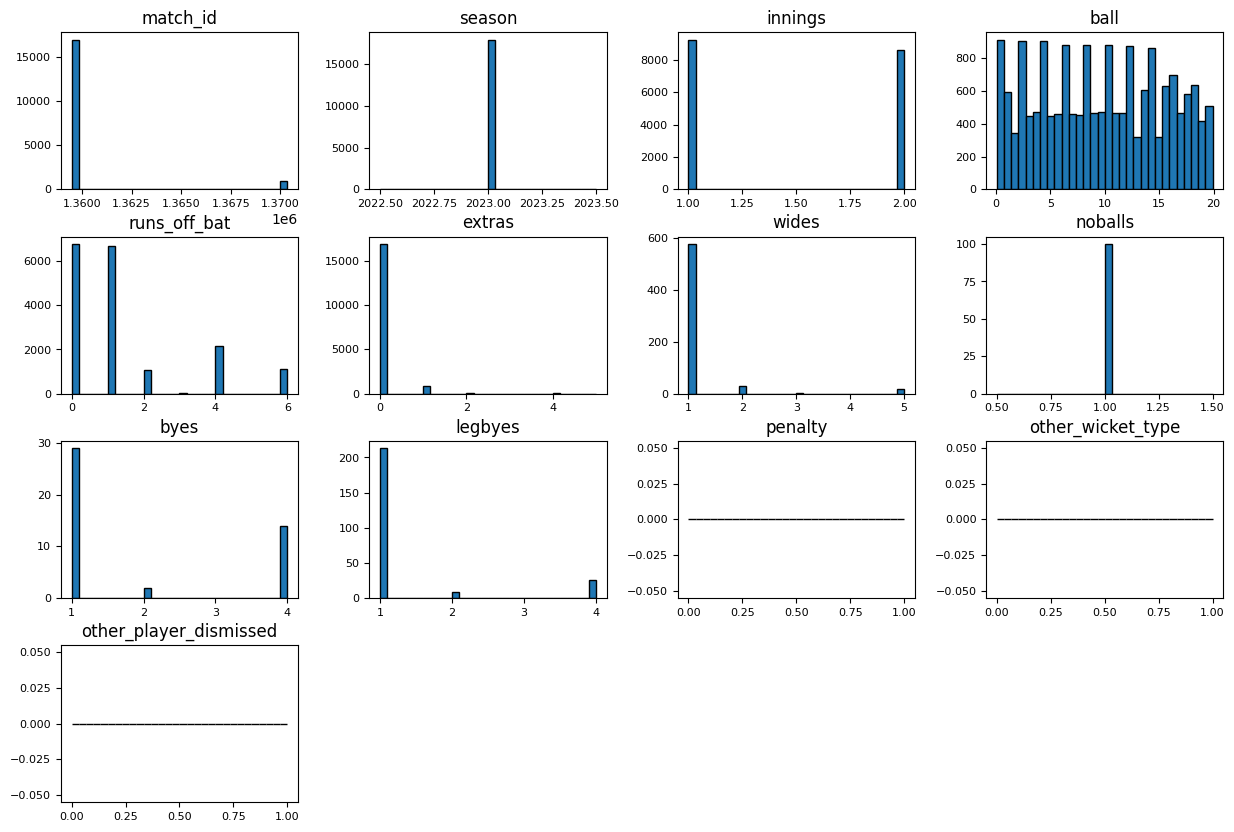

In [43]:
data1.hist(figsize=(15,10), bins=30, edgecolor="black", linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)
plt.show()

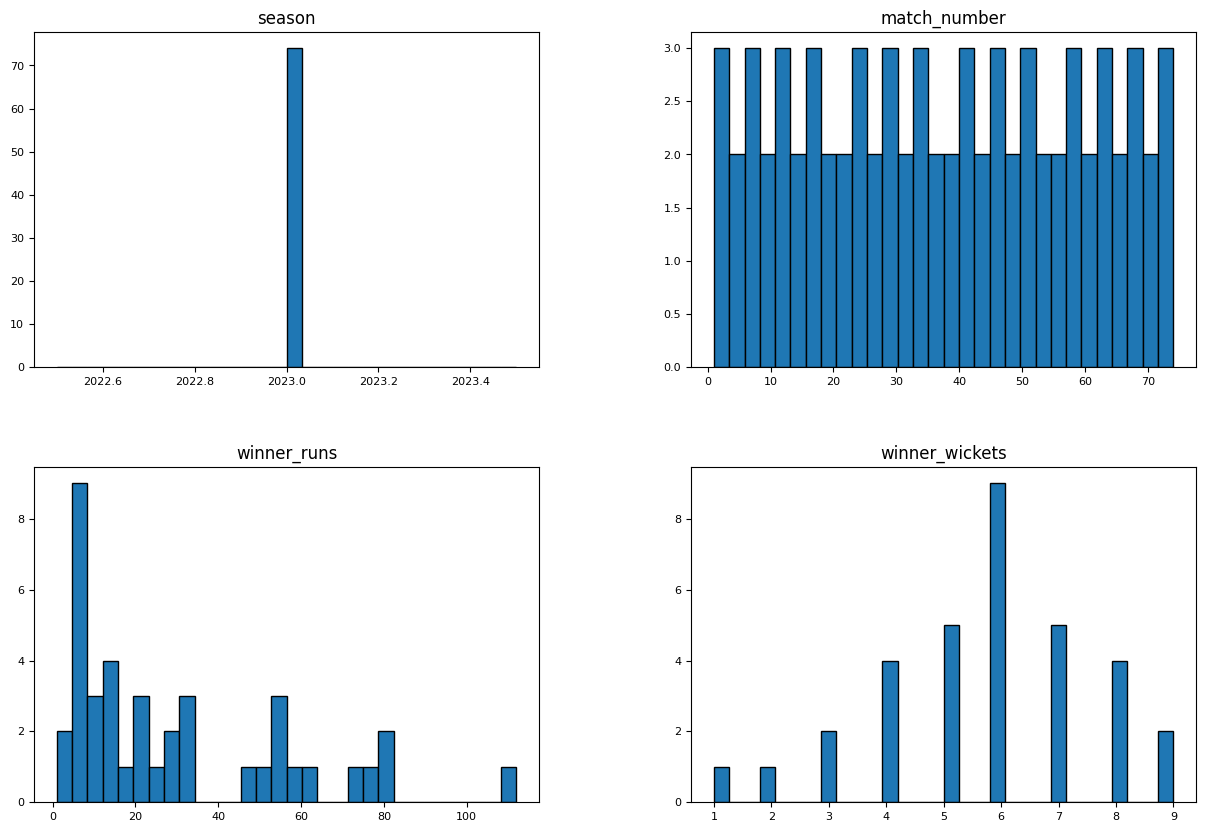

In [44]:
data2.hist(figsize=(15,10), bins=30, edgecolor="black", linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)
plt.show()

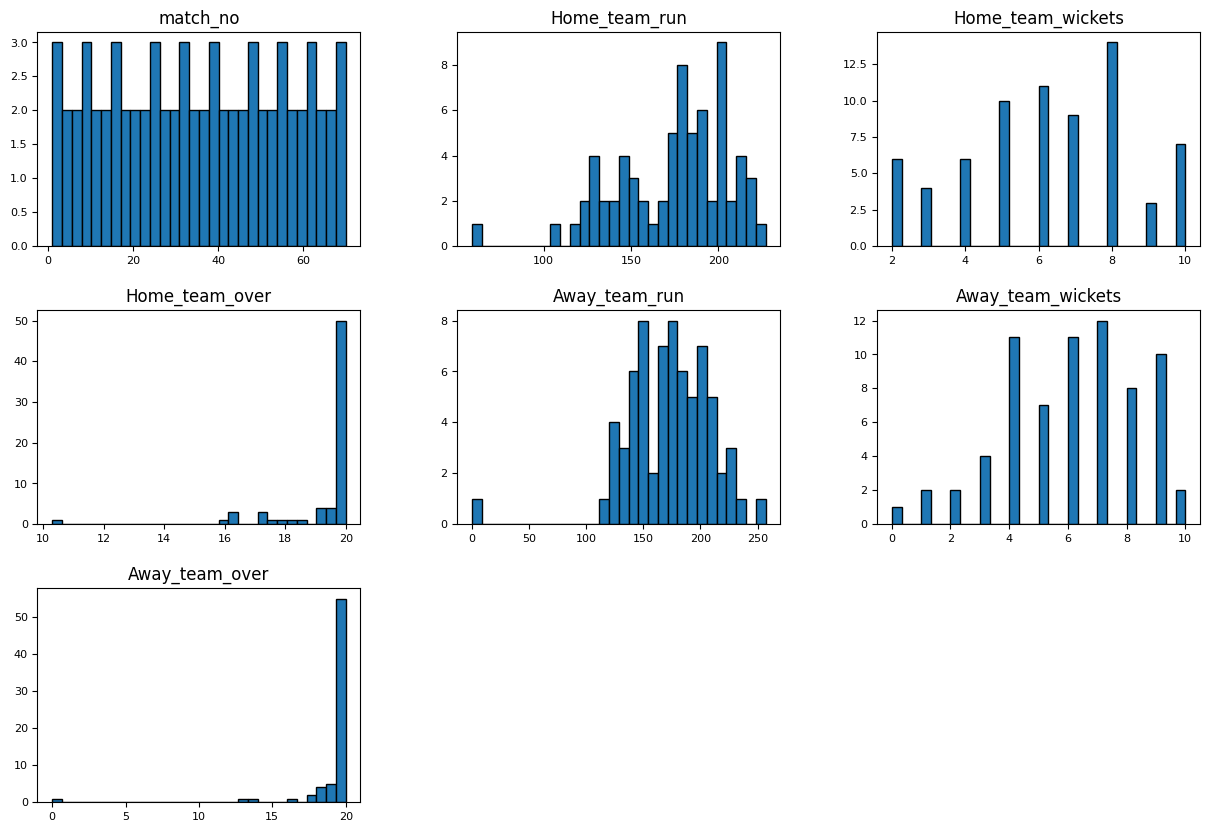

In [45]:
data3.hist(figsize=(15,10), bins=30, edgecolor="black", linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)
plt.show()

In [24]:
data1.describe(include='all')

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
count,1.786300e+04,17863.0,17863,17863,17863.000000,17863.000000,17863,17863,17863,17863,...,17863.000000,626.000000,100.0,45.000000,247.000000,0.0,916,916,0.0,0.0
unique,NaN,NaN,56,12,NaN,NaN,10,10,177,167,...,NaN,NaN,NaN,NaN,NaN,NaN,9,153,NaN,NaN
top,NaN,NaN,2023-04-30,"MA Chidambaram Stadium, Chepauk, Chennai",NaN,NaN,Gujarat Titans,Gujarat Titans,Shubman Gill,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,caught,WP Saha,NaN,NaN
freq,NaN,NaN,510,2210,NaN,NaN,2050,2045,582,676,...,NaN,NaN,NaN,NaN,NaN,NaN,600,16,NaN,NaN
mean,1.360080e+06,2023.0,NaN,NaN,1.482618,9.684326,NaN,NaN,NaN,NaN,...,0.070537,1.182109,1.0,1.977778,1.340081,NaN,NaN,NaN,NaN,NaN
std,2.420953e+03,0.0,NaN,NaN,0.499712,5.715014,NaN,NaN,NaN,NaN,...,0.348479,0.736738,0.0,1.389717,0.913835,NaN,NaN,NaN,NaN,NaN
min,1.359475e+06,2023.0,NaN,NaN,1.000000,0.100000,NaN,NaN,NaN,NaN,...,0.000000,1.000000,1.0,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN
25%,1.359493e+06,2023.0,NaN,NaN,1.000000,4.600000,NaN,NaN,NaN,NaN,...,0.000000,1.000000,1.0,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN
50%,1.359511e+06,2023.0,NaN,NaN,1.000000,9.500000,NaN,NaN,NaN,NaN,...,0.000000,1.000000,1.0,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN
75%,1.359530e+06,2023.0,NaN,NaN,2.000000,14.500000,NaN,NaN,NaN,NaN,...,0.000000,1.000000,1.0,4.000000,1.000000,NaN,NaN,NaN,NaN,NaN


In [25]:
data2.describe(include='all')

,season,team1,team2,date,match_number,venue,city,toss_winner,toss_decision,player_of_match,umpire1,umpire2,reserve_umpire,match_referee,winner,winner_runs,winner_wickets,match_type
count,74.0,74,74,74,74.000000,74,74,74,74,73,74,74,74,74,74,40.000000,33.000000,74
unique,NaN,10,10,56,NaN,12,12,10,2,51,15,17,12,13,11,NaN,NaN,4
top,NaN,Chennai Super Kings,Mumbai Indians,2023/05/14,NaN,Narendra Modi Stadium,Ahmedabad,Rajasthan Royals,field,Shubman Gill,Nitin Menon,VK Sharma,A Bengeri,J Srinath,Gujarat Titans,NaN,NaN,Group
freq,NaN,9,10,2,NaN,9,9,10,53,4,11,10,9,12,11,NaN,NaN,70
mean,2023.0,NaN,NaN,NaN,37.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.400000,5.727273,NaN
std,0.0,NaN,NaN,NaN,21.505813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.554887,1.908414,NaN
min,2023.0,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN
25%,2023.0,NaN,NaN,NaN,19.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.750000,5.000000,NaN
50%,2023.0,NaN,NaN,NaN,37.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.000000,6.000000,NaN
75%,2023.0,NaN,NaN,NaN,55.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.250000,7.000000,NaN


In [26]:
data3.describe(include='all')

,match_no,Home_team_run,Home_team_wickets,Home_team_over,Away_team_run,Away_team_wickets,Away_team_over
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,35.500000,173.842857,6.228571,19.342857,173.114286,6.014286,19.220000
std,20.351085,32.356096,2.304195,1.534395,37.369887,2.318751,2.671568
min,1.000000,59.000000,2.000000,10.300000,0.000000,0.000000,0.000000
25%,18.250000,149.250000,5.000000,19.500000,151.000000,4.000000,20.000000
50%,35.500000,180.500000,6.000000,20.000000,174.500000,6.000000,20.000000
75%,52.750000,199.750000,8.000000,20.000000,198.750000,8.000000,20.000000
max,70.000000,227.000000,10.000000,20.000000,257.000000,10.000000,20.000000


### Questions to be answered:

Q1. Which team won the most number of matches in the entire IPL?

In [27]:
data2['winner'].value_counts()

Gujarat Titans                 11
Chennai Super Kings            10
Mumbai Indians                  9
Lucknow Super Giants            8
Rajasthan Royals                7
Royal Challengers Bangalore     7
Punjab Kings                    6
Kolkata Knight Riders           6
Delhi Capitals                  5
Sunrisers Hyderabad             4
No Result                       1
Name: winner, dtype: int64

Hence, Gujrat Titans won the most number of matches in the entire IPL.

<Axes: >

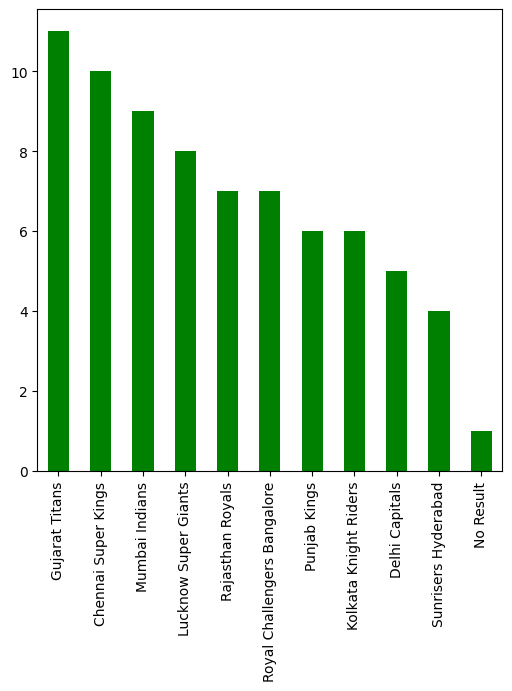

In [37]:
data2['winner'].value_counts().plot(kind='bar', figsize=(6,6), color='green')

<Axes: ylabel='winner'>

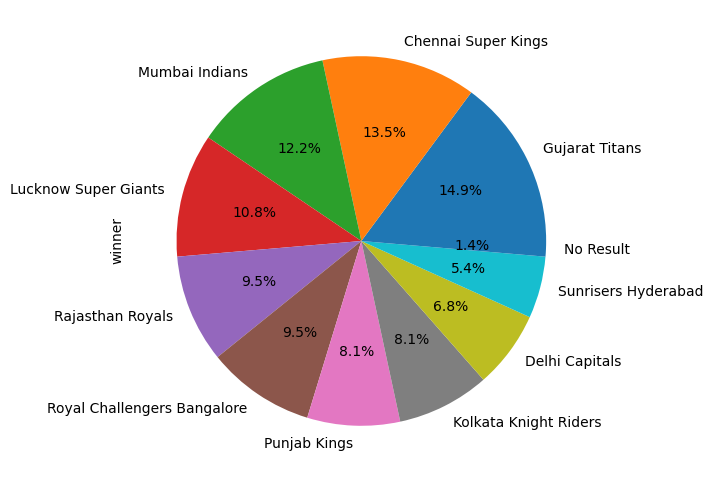

In [38]:
data2['winner'].value_counts().plot(kind='pie', figsize=(6,6), autopct='%1.1f%%')

Q2. Who became the player of the match most number of times?

In [39]:
data2.head()

,season,team1,team2,date,match_number,venue,city,toss_winner,toss_decision,player_of_match,umpire1,umpire2,reserve_umpire,match_referee,winner,winner_runs,winner_wickets,match_type
0,2023,Chennai Super Kings,Gujarat Titans,2023/03/31,1,Narendra Modi Stadium,Ahmedabad,Gujarat Titans,field,Rashid Khan,Nitin Menon,HAS Khalid,A Bengeri,J Srinath,Gujarat Titans,NaN,5.0,Group
1,2023,Punjab Kings,Kolkata Knight Riders,2023/04/01,2,Punjab Cricket Association IS Bindra Stadium,Chandigarh,Kolkata Knight Riders,field,Arshdeep Singh,BNJ Oxenford,YC Barde,PM Joshi,M Nayyar,Punjab Kings,7.0,NaN,Group
2,2023,Lucknow Super Giants,Delhi Capitals,2023/04/01,3,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow,Delhi Capitals,field,MA Wood,AK Chaudhary,NA Patwardhan,M Kuppuraj,DS Manohar,Lucknow Super Giants,50.0,NaN,Group
3,2023,Rajasthan Royals,Sunrisers Hyderabad,2023/04/02,4,Rajiv Gandhi International Stadium,Hyderabad,Sunrisers Hyderabad,field,JC Buttler,KN Ananthapadmanabhan,R Pandit,Abhijit Bhattacharya,V Narayan Kutty,Rajasthan Royals,72.0,NaN,Group
4,2023,Mumbai Indians,Royal Challengers Bangalore,2023/04/02,5,M Chinnaswamy Stadium,Bengaluru,Royal Challengers Bangalore,field,F du Plessis,Nitin Menon,Tapan Sharma,A Bengeri,J Srinath,Royal Challengers Bangalore,NaN,8.0,Group


In [40]:
data2["player_of_match"].value_counts()

Shubman Gill       4
YBK Jaiswal        4
MP Stoinis         3
DP Conway          3
RA Jadeja          3
N Pooran           2
RD Gaikwad         2
SA Yadav           2
CV Varun           2
C Green            2
V Kohli            2
MM Sharma          2
Rashid Khan        2
F du Plessis       2
RK Singh           2
S Dhawan           1
GD Phillips        1
J Little           1
MR Marsh           1
Mohammed Shami     1
Ishan Kishan       1
M Pathirana        1
PD Salt            1
AD Russell         1
JC Buttler         1
PN Mankad          1
P Simran Singh     1
WD Parnell         1
RR Rossouw         1
D Padikkal         1
MA Wood            1
MM Ali             1
A Manohar          1
AR Patel           1
AM Rahane          1
RG Sharma          1
R Ashwin           1
KH Pandya          1
HC Brook           1
SN Thakur          1
Sikandar Raza      1
VR Iyer            1
SO Hetmyer         1
NT Ellis           1
B Sai Sudharsan    1
Arshdeep Singh     1
Mohammed Siraj     1
I Sharma     

Hence, Shubman Gill and YBK Jaiswal became the player of the match most number of times.

<Axes: >

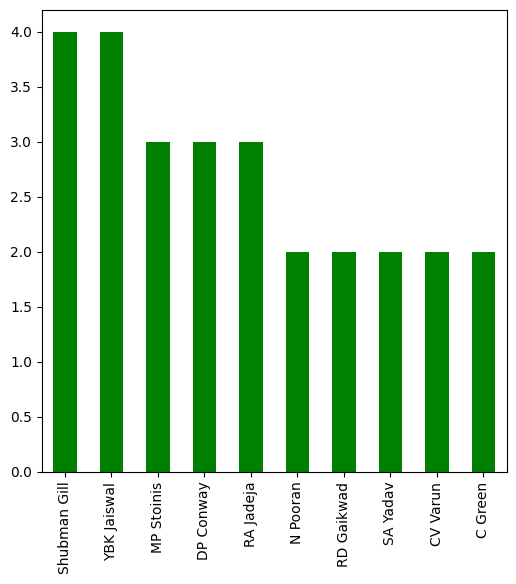

In [41]:
data2["player_of_match"].value_counts().head(10).plot(kind='bar', figsize=(6,6), color='green')

Q3. What is the percentage of matches where the team that won the toss also won the match?

In [55]:
df= data2[data2["toss_winner"]==data2["winner"]]
df.shape

(34, 18)

Hence, in total 34 matches, the team who won the toss also won the match.

Q4. What is the percentage of matches where the team that chose to bat first after winning the toss also won the match?

In [52]:
data2["toss_decision"].value_counts()

field    53
bat      21
Name: toss_decision, dtype: int64

<Axes: ylabel='toss_decision'>

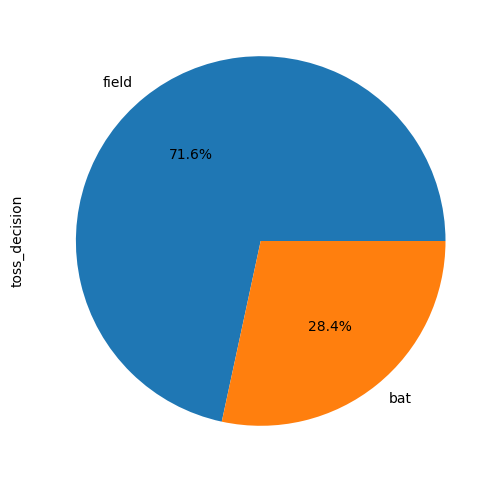

In [59]:
data2["toss_decision"].value_counts().plot(kind='pie', figsize=(6,6), autopct='%1.1f%%')

In [62]:
data2[data2["toss_decision"]=="bat"]["winner"].value_counts()


Kolkata Knight Riders          4
Delhi Capitals                 3
Lucknow Super Giants           2
Gujarat Titans                 2
Sunrisers Hyderabad            2
Mumbai Indians                 2
Royal Challengers Bangalore    2
Chennai Super Kings            2
Rajasthan Royals               1
Punjab Kings                   1
Name: winner, dtype: int64

<Axes: >

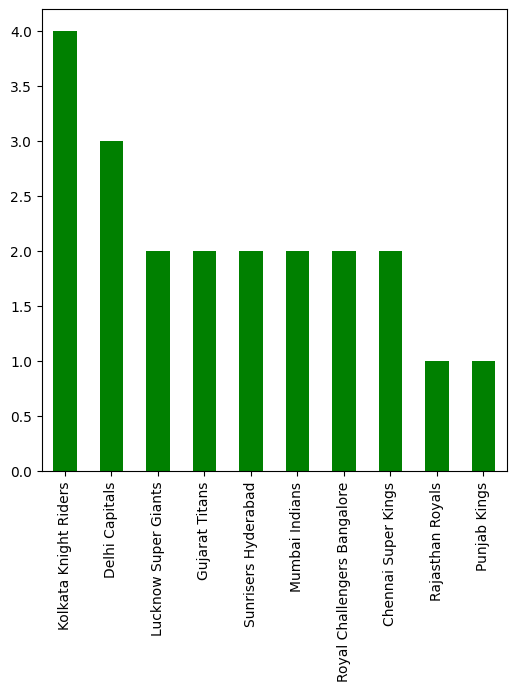

In [63]:
data2[data2["toss_decision"]=="bat"]["winner"].value_counts().plot(kind='bar', figsize=(6,6), color='green')

In [64]:
# percentage of matches won by team batting first by toss winning team

data2[data2["toss_decision"]=="bat"]["winner"].value_counts()/data2[data2["toss_decision"]=="bat"]["winner"].count()*100

Kolkata Knight Riders          19.047619
Delhi Capitals                 14.285714
Lucknow Super Giants            9.523810
Gujarat Titans                  9.523810
Sunrisers Hyderabad             9.523810
Mumbai Indians                  9.523810
Royal Challengers Bangalore     9.523810
Chennai Super Kings             9.523810
Rajasthan Royals                4.761905
Punjab Kings                    4.761905
Name: winner, dtype: float64

<Axes: ylabel='winner'>

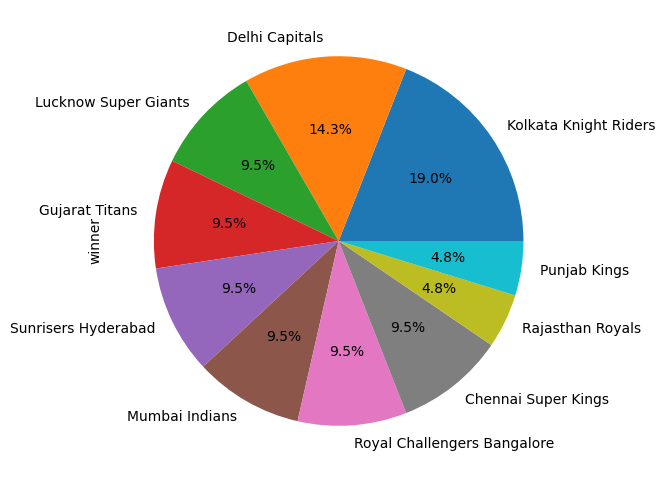

In [65]:
# percentage of matches won by team batting first by toss winning team in pie chart

data2[data2["toss_decision"]=="bat"]["winner"].value_counts().plot(kind='pie', figsize=(6,6), autopct='%1.1f%%')

Q4. Find the top 3 teams that have won the most number of toss.

In [67]:
data2["toss_winner"].value_counts()

Rajasthan Royals               10
Chennai Super Kings            10
Mumbai Indians                 10
Gujarat Titans                  9
Royal Challengers Bangalore     8
Delhi Capitals                  7
Sunrisers Hyderabad             7
Kolkata Knight Riders           5
Punjab Kings                    5
Lucknow Super Giants            3
Name: toss_winner, dtype: int64

Hence, the top 3 teams that have won the most number of toss are: RR, CSK, and MI.

<Axes: ylabel='Density'>

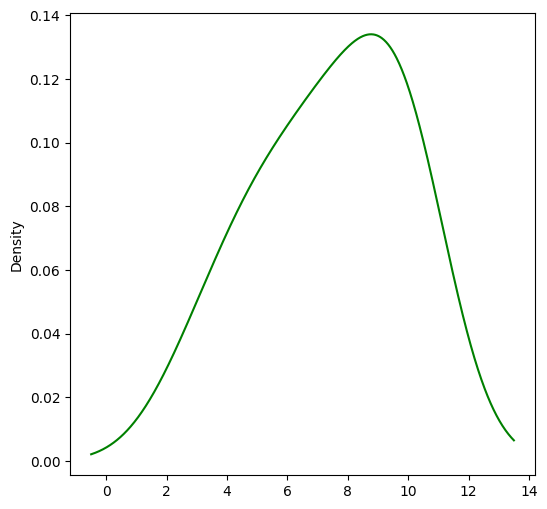

In [72]:
data2["toss_winner"].value_counts().plot(kind='kde', figsize=(6,6), color='green')

<Axes: ylabel='toss_winner'>

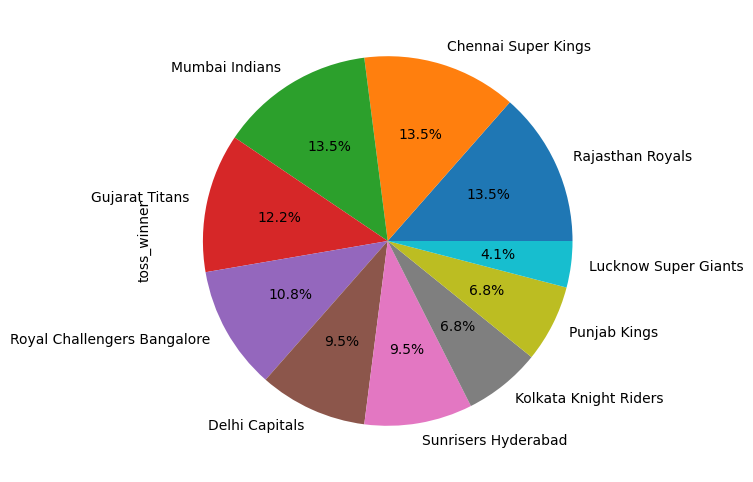

In [74]:
data2["toss_winner"].value_counts().plot(kind='pie', figsize=(6,6), autopct='%1.1f%%')

In [68]:
data2.head()

,season,team1,team2,date,match_number,venue,city,toss_winner,toss_decision,player_of_match,umpire1,umpire2,reserve_umpire,match_referee,winner,winner_runs,winner_wickets,match_type
0,2023,Chennai Super Kings,Gujarat Titans,2023/03/31,1,Narendra Modi Stadium,Ahmedabad,Gujarat Titans,field,Rashid Khan,Nitin Menon,HAS Khalid,A Bengeri,J Srinath,Gujarat Titans,NaN,5.0,Group
1,2023,Punjab Kings,Kolkata Knight Riders,2023/04/01,2,Punjab Cricket Association IS Bindra Stadium,Chandigarh,Kolkata Knight Riders,field,Arshdeep Singh,BNJ Oxenford,YC Barde,PM Joshi,M Nayyar,Punjab Kings,7.0,NaN,Group
2,2023,Lucknow Super Giants,Delhi Capitals,2023/04/01,3,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow,Delhi Capitals,field,MA Wood,AK Chaudhary,NA Patwardhan,M Kuppuraj,DS Manohar,Lucknow Super Giants,50.0,NaN,Group
3,2023,Rajasthan Royals,Sunrisers Hyderabad,2023/04/02,4,Rajiv Gandhi International Stadium,Hyderabad,Sunrisers Hyderabad,field,JC Buttler,KN Ananthapadmanabhan,R Pandit,Abhijit Bhattacharya,V Narayan Kutty,Rajasthan Royals,72.0,NaN,Group
4,2023,Mumbai Indians,Royal Challengers Bangalore,2023/04/02,5,M Chinnaswamy Stadium,Bengaluru,Royal Challengers Bangalore,field,F du Plessis,Nitin Menon,Tapan Sharma,A Bengeri,J Srinath,Royal Challengers Bangalore,NaN,8.0,Group


Q5. Find the total number of no-balls in the 10th match played in this year's IPL.

In [75]:
data1.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,1359475,2023,2023-03-31,"Narendra Modi Stadium, Ahmedabad",1,0.1,Chennai Super Kings,Gujarat Titans,DP Conway,RD Gaikwad,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1359475,2023,2023-03-31,"Narendra Modi Stadium, Ahmedabad",1,0.2,Chennai Super Kings,Gujarat Titans,DP Conway,RD Gaikwad,...,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,1359475,2023,2023-03-31,"Narendra Modi Stadium, Ahmedabad",1,0.3,Chennai Super Kings,Gujarat Titans,RD Gaikwad,DP Conway,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1359475,2023,2023-03-31,"Narendra Modi Stadium, Ahmedabad",1,0.4,Chennai Super Kings,Gujarat Titans,RD Gaikwad,DP Conway,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1359475,2023,2023-03-31,"Narendra Modi Stadium, Ahmedabad",1,0.5,Chennai Super Kings,Gujarat Titans,DP Conway,RD Gaikwad,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
data2.head()

,season,team1,team2,date,match_number,venue,city,toss_winner,toss_decision,player_of_match,umpire1,umpire2,reserve_umpire,match_referee,winner,winner_runs,winner_wickets,match_type
0,2023,Chennai Super Kings,Gujarat Titans,2023/03/31,1,Narendra Modi Stadium,Ahmedabad,Gujarat Titans,field,Rashid Khan,Nitin Menon,HAS Khalid,A Bengeri,J Srinath,Gujarat Titans,NaN,5.0,Group
1,2023,Punjab Kings,Kolkata Knight Riders,2023/04/01,2,Punjab Cricket Association IS Bindra Stadium,Chandigarh,Kolkata Knight Riders,field,Arshdeep Singh,BNJ Oxenford,YC Barde,PM Joshi,M Nayyar,Punjab Kings,7.0,NaN,Group
2,2023,Lucknow Super Giants,Delhi Capitals,2023/04/01,3,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow,Delhi Capitals,field,MA Wood,AK Chaudhary,NA Patwardhan,M Kuppuraj,DS Manohar,Lucknow Super Giants,50.0,NaN,Group
3,2023,Rajasthan Royals,Sunrisers Hyderabad,2023/04/02,4,Rajiv Gandhi International Stadium,Hyderabad,Sunrisers Hyderabad,field,JC Buttler,KN Ananthapadmanabhan,R Pandit,Abhijit Bhattacharya,V Narayan Kutty,Rajasthan Royals,72.0,NaN,Group
4,2023,Mumbai Indians,Royal Challengers Bangalore,2023/04/02,5,M Chinnaswamy Stadium,Bengaluru,Royal Challengers Bangalore,field,F du Plessis,Nitin Menon,Tapan Sharma,A Bengeri,J Srinath,Royal Challengers Bangalore,NaN,8.0,Group


In [77]:
data1.match_id.unique() # id of 10th match is 1359484

array([1359475, 1359476, 1359477, 1359478, 1359479, 1359480, 1359481,
       1359482, 1359483, 1359484, 1359485, 1359486, 1359487, 1359488,
       1359489, 1359490, 1359491, 1359492, 1359493, 1359494, 1359495,
       1359496, 1359497, 1359498, 1359499, 1359500, 1359501, 1359502,
       1359503, 1359504, 1359505, 1359506, 1359507, 1359508, 1359509,
       1359510, 1359511, 1359512, 1359513, 1359514, 1359515, 1359516,
       1359517, 1359518, 1359519, 1359520, 1359521, 1359522, 1359523,
       1359524, 1359525, 1359526, 1359527, 1359528, 1359529, 1359530,
       1359531, 1359532, 1359533, 1359534, 1359535, 1359536, 1359537,
       1359538, 1359539, 1359540, 1359541, 1359542, 1359543, 1359544,
       1370350, 1370351, 1370352, 1370353])